In [2]:
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.colors as mcolors
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# from pykrige.ok import OrdinaryKriging
# import pykrige.kriging_tools as kt
# from pykrige.kriging_tools import write_asc_grid
# import gstools as gs

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import Rbf, RBFInterpolator
import gstools as gs
from matplotlib import cm

In [22]:
def edge_points(x, y):
    points = []
    x_start, x_end = x[0], x[-1]
    y_start, y_end = y[0], y[-1]
    
    for i in grid_lon:
        points.append([i, y_start])
        points.append([i, y_end])
        
    for i in grid_lat:
        points.append([x_start, i])
        points.append([x_end, i])
        
    return points

data_file = "../../../../data/one_day_data/2020/08/2020-08-01"
df = pd.read_csv(data_file + '/4-30.csv', index_col=0)
df.head()

,LON,LAT,hour-rain,AT1,RH1,SOL,WD1,WS1,PRS,SLP
Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,28.200000,53.200000,27.000000,226.000000,2.000000,1007.600000,1010.500000
NagNayon_00181273,121.0285,14.7192,0.0,29.400000,54.600000,54.000000,173.000000,0.600000,1004.800000,1011.100000
Sinegue_00181300,120.9319,14.4599,39.0,24.800000,81.500000,41.000000,89.000000,0.200000,1008.900000,1010.600000
DLSAU_00174722,120.9974,14.6705,0.0,26.532066,73.482975,178.104132,148.930579,0.326116,1008.667273,1011.166942
ASTI_00173457,121.0721,14.6471,0.0,28.600000,51.400000,219.000000,320.000000,3.200000,1002.800000,1010.500000


------------------------------ gaussian ------------------------------
epslilon: 40  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134   0.717477
NagNayon_00181273       121.0285  14.7192   0.717477
Sinegue_00181300        120.9319  14.4599  39.000000
DLSAU_00174722          120.9974  14.6705   0.717477
ASTI_00173457           121.0721  14.6471   0.717477
MM-SanAndres_00173459   121.0061  14.5837   2.500000
Vlz-DRRMO_00174734      120.9683  14.6934   1.500000
UniManila_00181287      120.9815  14.5917  14.500000
TUP-Taguig_00181272     121.0358  14.5107   1.000000
MM-Catmon_00174723      120.9552  14.6706   4.500000
E-Library_00181274      121.0666  14.5467   0.717477
RAVE_00181290           121.0974  14.5729   0.717477
Anabu-1B_00181286       120.9398  14.3961  24.000000
MM-Tapayan_00173458     121.1156  14.5414   0.717477
CMuntilupa_00181294     121.0513  14.4575   0.717477
NAMRIA_00181292         121.0412  14.5354   0.717477
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


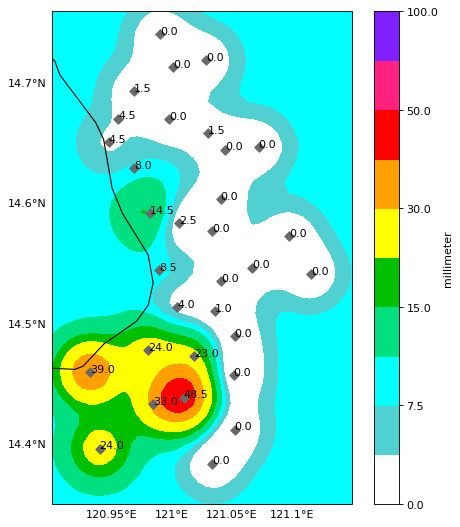

------------------------------ gaussian ------------------------------
epslilon: 41  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134   0.806458
NagNayon_00181273       121.0285  14.7192   0.806458
Sinegue_00181300        120.9319  14.4599  39.000000
DLSAU_00174722          120.9974  14.6705   0.806458
ASTI_00173457           121.0721  14.6471   0.806458
MM-SanAndres_00173459   121.0061  14.5837   2.500000
Vlz-DRRMO_00174734      120.9683  14.6934   1.500000
UniManila_00181287      120.9815  14.5917  14.500000
TUP-Taguig_00181272     121.0358  14.5107   1.000000
MM-Catmon_00174723      120.9552  14.6706   4.500000
E-Library_00181274      121.0666  14.5467   0.806458
RAVE_00181290           121.0974  14.5729   0.806458
Anabu-1B_00181286       120.9398  14.3961  24.000000
MM-Tapayan_00173458     121.1156  14.5414   0.806458
CMuntilupa_00181294     121.0513  14.4575   0.806458
NAMRIA_00181292         121.0412  14.5354   0.806458
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


[[8.64318299 8.70626831 8.87047028 ... 8.61313724 8.61316906 8.61317728]
 [8.66934316 8.78743952 9.09482683 ... 8.61303344 8.61313154 8.61315939]
 [8.70984007 8.91309558 9.442139   ... 8.61272315 8.61300372 8.61309315]
 ...
 [8.61318313 8.61318302 8.61318257 ... 8.61318316 8.61318316 8.61318316]
 [8.61318315 8.61318313 8.61318303 ... 8.61318316 8.61318316 8.61318316]
 [8.61318316 8.61318315 8.61318313 ... 8.61318316 8.61318316 8.61318316]]


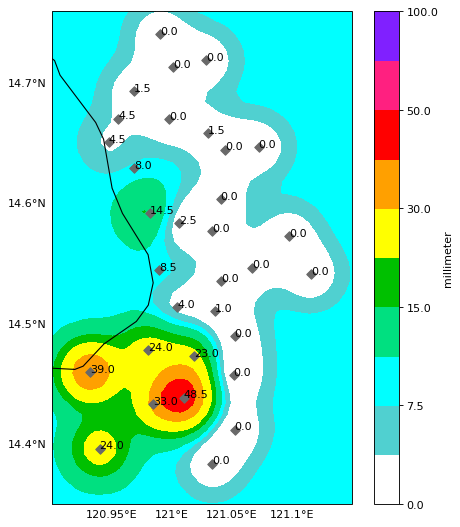

------------------------------ gaussian ------------------------------
epslilon: 42  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134    0.70321
NagNayon_00181273       121.0285  14.7192    0.70321
Sinegue_00181300        120.9319  14.4599   39.00000
DLSAU_00174722          120.9974  14.6705    0.70321
ASTI_00173457           121.0721  14.6471    0.70321
MM-SanAndres_00173459   121.0061  14.5837    2.50000
Vlz-DRRMO_00174734      120.9683  14.6934    1.50000
UniManila_00181287      120.9815  14.5917   14.50000
TUP-Taguig_00181272     121.0358  14.5107    1.00000
MM-Catmon_00174723      120.9552  14.6706    4.50000
E-Library_00181274      121.0666  14.5467    0.70321
RAVE_00181290           121.0974  14.5729    0.70321
Anabu-1B_00181286       120.9398  14.3961   24.00000
MM-Tapayan_00173458     121.1156  14.5414    0.70321
CMuntilupa_00181294     121.0513  14.4575    0.70321
NAMRIA_00181292         121.0412  14.5354    0.70321
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


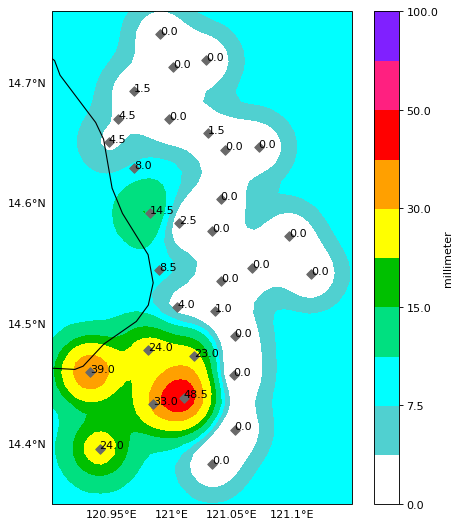

------------------------------ gaussian ------------------------------
epslilon: 43  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134   0.866285
NagNayon_00181273       121.0285  14.7192   0.866285
Sinegue_00181300        120.9319  14.4599  39.000000
DLSAU_00174722          120.9974  14.6705   0.866285
ASTI_00173457           121.0721  14.6471   0.866285
MM-SanAndres_00173459   121.0061  14.5837   2.500000
Vlz-DRRMO_00174734      120.9683  14.6934   1.500000
UniManila_00181287      120.9815  14.5917  14.500000
TUP-Taguig_00181272     121.0358  14.5107   1.000000
MM-Catmon_00174723      120.9552  14.6706   4.500000
E-Library_00181274      121.0666  14.5467   0.866285
RAVE_00181290           121.0974  14.5729   0.866285
Anabu-1B_00181286       120.9398  14.3961  24.000000
MM-Tapayan_00173458     121.1156  14.5414   0.866285
CMuntilupa_00181294     121.0513  14.4575   0.866285
NAMRIA_00181292         121.0412  14.5354   0.866285
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


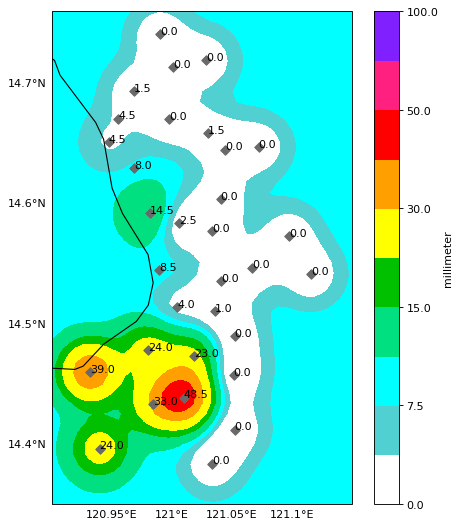

------------------------------ gaussian ------------------------------
epslilon: 44  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134   0.102227
NagNayon_00181273       121.0285  14.7192   0.102227
Sinegue_00181300        120.9319  14.4599  39.000000
DLSAU_00174722          120.9974  14.6705   0.102227
ASTI_00173457           121.0721  14.6471   0.102227
MM-SanAndres_00173459   121.0061  14.5837   2.500000
Vlz-DRRMO_00174734      120.9683  14.6934   1.500000
UniManila_00181287      120.9815  14.5917  14.500000
TUP-Taguig_00181272     121.0358  14.5107   1.000000
MM-Catmon_00174723      120.9552  14.6706   4.500000
E-Library_00181274      121.0666  14.5467   0.102227
RAVE_00181290           121.0974  14.5729   0.102227
Anabu-1B_00181286       120.9398  14.3961  24.000000
MM-Tapayan_00173458     121.1156  14.5414   0.102227
CMuntilupa_00181294     121.0513  14.4575   0.102227
NAMRIA_00181292         121.0412  14.5354   0.102227
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


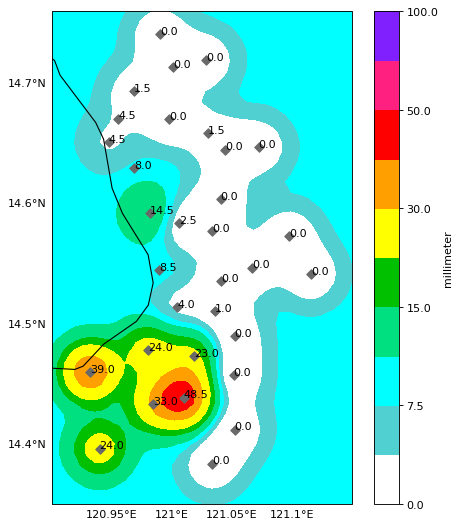

------------------------------ gaussian ------------------------------
epslilon: 45  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134   0.983488
NagNayon_00181273       121.0285  14.7192   0.983488
Sinegue_00181300        120.9319  14.4599  39.000000
DLSAU_00174722          120.9974  14.6705   0.983488
ASTI_00173457           121.0721  14.6471   0.983488
MM-SanAndres_00173459   121.0061  14.5837   2.500000
Vlz-DRRMO_00174734      120.9683  14.6934   1.500000
UniManila_00181287      120.9815  14.5917  14.500000
TUP-Taguig_00181272     121.0358  14.5107   1.000000
MM-Catmon_00174723      120.9552  14.6706   4.500000
E-Library_00181274      121.0666  14.5467   0.983488
RAVE_00181290           121.0974  14.5729   0.983488
Anabu-1B_00181286       120.9398  14.3961  24.000000
MM-Tapayan_00173458     121.1156  14.5414   0.983488
CMuntilupa_00181294     121.0513  14.4575   0.983488
NAMRIA_00181292         121.0412  14.5354   0.983488
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


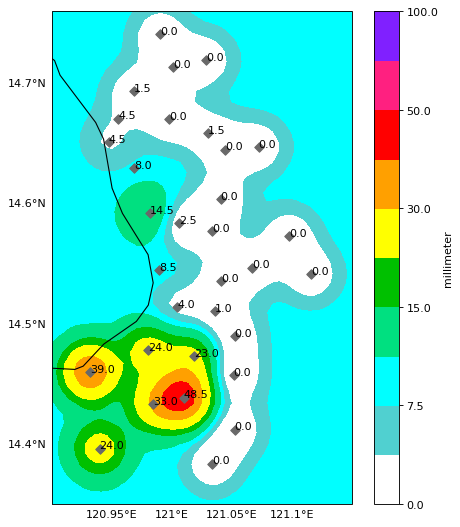

------------------------------ gaussian ------------------------------
epslilon: 46  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134    0.24157
NagNayon_00181273       121.0285  14.7192    0.24157
Sinegue_00181300        120.9319  14.4599   39.00000
DLSAU_00174722          120.9974  14.6705    0.24157
ASTI_00173457           121.0721  14.6471    0.24157
MM-SanAndres_00173459   121.0061  14.5837    2.50000
Vlz-DRRMO_00174734      120.9683  14.6934    1.50000
UniManila_00181287      120.9815  14.5917   14.50000
TUP-Taguig_00181272     121.0358  14.5107    1.00000
MM-Catmon_00174723      120.9552  14.6706    4.50000
E-Library_00181274      121.0666  14.5467    0.24157
RAVE_00181290           121.0974  14.5729    0.24157
Anabu-1B_00181286       120.9398  14.3961   24.00000
MM-Tapayan_00173458     121.1156  14.5414    0.24157
CMuntilupa_00181294     121.0513  14.4575    0.24157
NAMRIA_00181292         121.0412  14.5354    0.24157
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


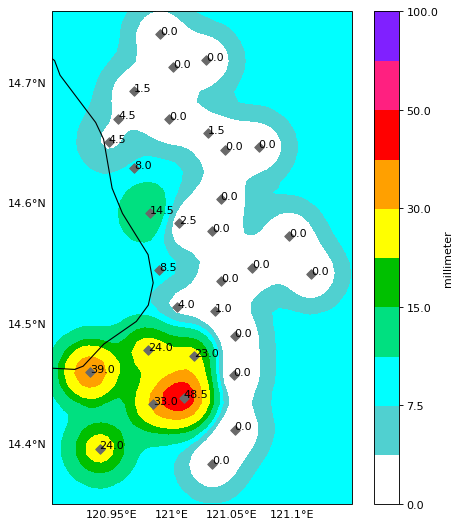

------------------------------ gaussian ------------------------------
epslilon: 47  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134   0.784951
NagNayon_00181273       121.0285  14.7192   0.784951
Sinegue_00181300        120.9319  14.4599  39.000000
DLSAU_00174722          120.9974  14.6705   0.784951
ASTI_00173457           121.0721  14.6471   0.784951
MM-SanAndres_00173459   121.0061  14.5837   2.500000
Vlz-DRRMO_00174734      120.9683  14.6934   1.500000
UniManila_00181287      120.9815  14.5917  14.500000
TUP-Taguig_00181272     121.0358  14.5107   1.000000
MM-Catmon_00174723      120.9552  14.6706   4.500000
E-Library_00181274      121.0666  14.5467   0.784951
RAVE_00181290           121.0974  14.5729   0.784951
Anabu-1B_00181286       120.9398  14.3961  24.000000
MM-Tapayan_00173458     121.1156  14.5414   0.784951
CMuntilupa_00181294     121.0513  14.4575   0.784951
NAMRIA_00181292         121.0412  14.5354   0.784951
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


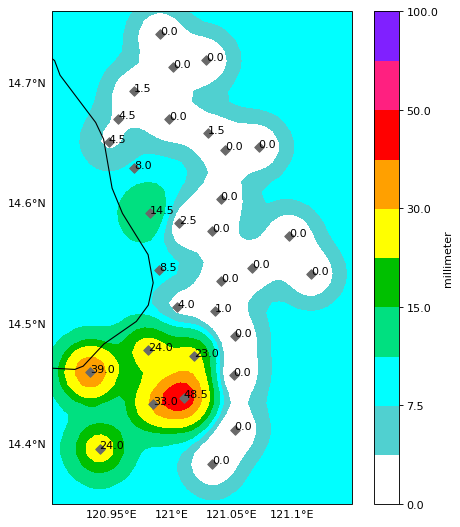

------------------------------ gaussian ------------------------------
epslilon: 48  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134   0.147345
NagNayon_00181273       121.0285  14.7192   0.147345
Sinegue_00181300        120.9319  14.4599  39.000000
DLSAU_00174722          120.9974  14.6705   0.147345
ASTI_00173457           121.0721  14.6471   0.147345
MM-SanAndres_00173459   121.0061  14.5837   2.500000
Vlz-DRRMO_00174734      120.9683  14.6934   1.500000
UniManila_00181287      120.9815  14.5917  14.500000
TUP-Taguig_00181272     121.0358  14.5107   1.000000
MM-Catmon_00174723      120.9552  14.6706   4.500000
E-Library_00181274      121.0666  14.5467   0.147345
RAVE_00181290           121.0974  14.5729   0.147345
Anabu-1B_00181286       120.9398  14.3961  24.000000
MM-Tapayan_00173458     121.1156  14.5414   0.147345
CMuntilupa_00181294     121.0513  14.4575   0.147345
NAMRIA_00181292         121.0412  14.5354   0.147345
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


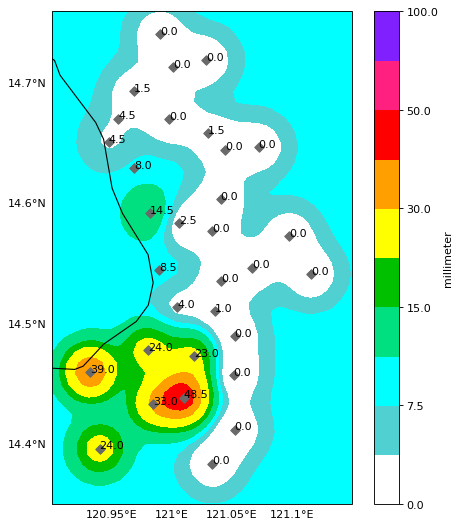

------------------------------ gaussian ------------------------------
epslilon: 49  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134   0.119322
NagNayon_00181273       121.0285  14.7192   0.119322
Sinegue_00181300        120.9319  14.4599  39.000000
DLSAU_00174722          120.9974  14.6705   0.119322
ASTI_00173457           121.0721  14.6471   0.119322
MM-SanAndres_00173459   121.0061  14.5837   2.500000
Vlz-DRRMO_00174734      120.9683  14.6934   1.500000
UniManila_00181287      120.9815  14.5917  14.500000
TUP-Taguig_00181272     121.0358  14.5107   1.000000
MM-Catmon_00174723      120.9552  14.6706   4.500000
E-Library_00181274      121.0666  14.5467   0.119322
RAVE_00181290           121.0974  14.5729   0.119322
Anabu-1B_00181286       120.9398  14.3961  24.000000
MM-Tapayan_00173458     121.1156  14.5414   0.119322
CMuntilupa_00181294     121.0513  14.4575   0.119322
NAMRIA_00181292         121.0412  14.5354   0.119322
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


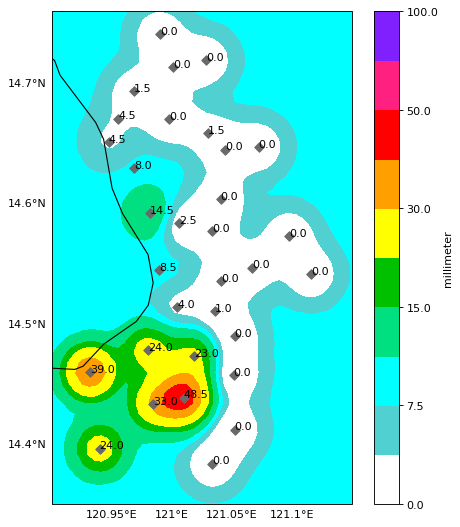

------------------------------ gaussian ------------------------------
epslilon: 50  neighbors: 1
                             LON      LAT  hour-rain
Vlz-Bagbaguin_00174731  121.0009  14.7134     0.2267
NagNayon_00181273       121.0285  14.7192     0.2267
Sinegue_00181300        120.9319  14.4599    39.0000
DLSAU_00174722          120.9974  14.6705     0.2267
ASTI_00173457           121.0721  14.6471     0.2267
MM-SanAndres_00173459   121.0061  14.5837     2.5000
Vlz-DRRMO_00174734      120.9683  14.6934     1.5000
UniManila_00181287      120.9815  14.5917    14.5000
TUP-Taguig_00181272     121.0358  14.5107     1.0000
MM-Catmon_00174723      120.9552  14.6706     4.5000
E-Library_00181274      121.0666  14.5467     0.2267
RAVE_00181290           121.0974  14.5729     0.2267
Anabu-1B_00181286       120.9398  14.3961    24.0000
MM-Tapayan_00173458     121.1156  14.5414     0.2267
CMuntilupa_00181294     121.0513  14.4575     0.2267
NAMRIA_00181292         121.0412  14.5354     0.2267
N

/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


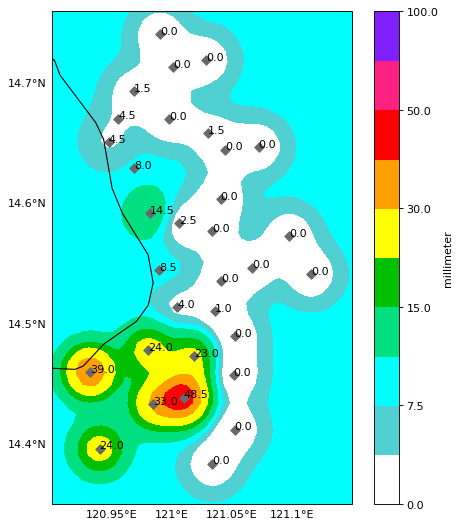

In [28]:
def rbf_test(epsilon, neighbors=1, kernel='gaussian', grid_num=50):
    print('-'*30, kernel, '-'*30)
    print('epslilon:', epsilon, ' neighbors:', neighbors)
    
    grid_lon = np.round(np.linspace(120.90, 121.150, grid_num), decimals=3)
    grid_lat = np.round(np.linspace(14.350, 14.760, grid_num), decimals=3)
    
    new_df = df[['LON', 'LAT', 'hour-rain']]
    for point in edge_points(grid_lon, grid_lat):
        new_df.append({'LON': point[0], 'LAT': point[1], 'hour-rain': 0}, ignore_index=True)
    
    rain_arr = new_df['hour-rain']
    new_df['hour-rain'] = np.where(rain_arr == 0, np.random.rand(), rain_arr)
    print(new_df)
    
    rbfi = RBFInterpolator(y=new_df[['LON','LAT']],d=new_df['hour-rain'], kernel=kernel, epsilon=epsilon)
    
#     grid_lon = np.round(np.linspace(120.90, 121.150, grid_num), decimals=3)
#     grid_lat = np.round(np.linspace(14.350, 14.760, grid_num), decimals=3)

    xi, yi = np.meshgrid(grid_lon, grid_lat)
    xgrid = np.around(np.mgrid[120.90:121.150:50j, 14.350:14.760:50j], decimals=3)
    xfloat = np.around(xgrid, decimals=3).reshape(2, -1).T
    
    xmi, ymi = xfloat[:, 0], xfloat[:, 1]
#     print(xmi)
#     print('-'*50)
#     print(xi)
#     print('-'*50)
#     print(xfloat)
    
    z1 = rbfi(xfloat)
    z1 = z1.reshape(grid_num, grid_num)
    rain_data = np.where(z1 > 100, 100, z1)
    rain_data = np.where(rain_data < 0, 0, rain_data)
    
    np.savetxt('rain.txt', rain_data)
    print(rain_data)
    
    fig = plt.figure(figsize=(7, 8), dpi=80)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([120.90, 121.150, 14.350, 14.760])
    ax.add_feature(cfeature.COASTLINE)
    gl = ax.gridlines(draw_labels=True, alpha=0)
    gl.right_labels = False
    gl.top_labels = False
    
    clevs = [0, 5, 7.5, 10, 15, 20, 30, 40, 50, 70, 100]
    cmap_data = [(1.0, 1.0, 1.0),
                (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
                (0.0, 1.0, 1.0),
                (0.0, 0.8784313797950745, 0.501960813999176),
                (0.0, 0.7529411911964417, 0.0),
                (0.501960813999176, 0.8784313797950745, 0.0),
                (1.0, 1.0, 0.0),
                (1.0, 0.6274510025978088, 0.0),
                (1.0, 0.0, 0.0),
                (1.0, 0.125490203499794, 0.501960813999176),
                (0.9411764740943909, 0.250980406999588, 1.0),
                (0.501960813999176, 0.125490203499794, 1.0),
                ]
    cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
    norm = mcolors.BoundaryNorm(clevs, cmap.N)

    cs = ax.contourf(*xgrid, rain_data, clevs, cmap=cmap, norm=norm)
    
    cbar = plt.colorbar(cs, orientation='vertical')
    cbar.set_label('millimeter')
    ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')
    for i, val in enumerate(df['hour-rain']):
        ax.annotate(val, (df['LON'][i], df['LAT'][i]))
    plt.show()
    plt.close()
# kernels = ['linear', 'thin_plate_spline', 'cubic', 'quintic', 'multiquadric', 'inverse_multiquadric', 'inverse_quadratic', 'gaussian']
# for kernel in kernels:
#     rbf_test(kernel)
epsilon = 45
neighbors = 5
for i in range(40, 51):
    rbf_test(epsilon=i)

In [8]:
grid_num = 10
grid_lon = np.round(np.linspace(120.90, 121.150, grid_num), decimals=3)
grid_lat = np.round(np.linspace(14.350, 14.760, grid_num), decimals=3)

def edge_points(x, y):
    points = []
    x_start, x_end = x[0], x[-1]
    y_start, y_end = y[0], y[-1]
    
    for i in grid_lon:
        points.append([i, y_start])
        points.append([i, y_end])
        
    for i in grid_lat:
        points.append([x_start, i])
        points.append([x_end, i])
        
    return points

edges = edge_points(grid_lon, grid_lat)
print(edges)

[[120.9, 14.35], [120.9, 14.76], [120.928, 14.35], [120.928, 14.76], [120.956, 14.35], [120.956, 14.76], [120.983, 14.35], [120.983, 14.76], [121.011, 14.35], [121.011, 14.76], [121.039, 14.35], [121.039, 14.76], [121.067, 14.35], [121.067, 14.76], [121.094, 14.35], [121.094, 14.76], [121.122, 14.35], [121.122, 14.76], [121.15, 14.35], [121.15, 14.76], [120.9, 14.35], [121.15, 14.35], [120.9, 14.396], [121.15, 14.396], [120.9, 14.441], [121.15, 14.441], [120.9, 14.487], [121.15, 14.487], [120.9, 14.532], [121.15, 14.532], [120.9, 14.578], [121.15, 14.578], [120.9, 14.623], [121.15, 14.623], [120.9, 14.669], [121.15, 14.669], [120.9, 14.714], [121.15, 14.714], [120.9, 14.76], [121.15, 14.76]]


In [16]:
new_df = df[['LON', 'LAT', 'hour-rain']]
for point in edges:
    new_df.append({'LON': point[0], 'LAT': point[1], 'hour-rain': 0}, ignore_index=True)
    
new_df

,LON,LAT,hour-rain
Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0
NagNayon_00181273,121.0285,14.7192,0.0
Sinegue_00181300,120.9319,14.4599,39.0
DLSAU_00174722,120.9974,14.6705,0.0
ASTI_00173457,121.0721,14.6471,0.0
MM-SanAndres_00173459,121.0061,14.5837,2.5
Vlz-DRRMO_00174734,120.9683,14.6934,1.5
UniManila_00181287,120.9815,14.5917,14.5
TUP-Taguig_00181272,121.0358,14.5107,1.0
MM-Catmon_00174723,120.9552,14.6706,4.5
